In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl

In [49]:

def augment_image(X, rotation = 0.2, zoom = 0.2,  flip = "horizontal", translation = 0.2):
    rotation_ = tf.keras.Sequential([
    tfkl.RandomRotation(rotation),
    ])

    zoom_ = tf.keras.Sequential([
    tfkl.RandomZoom(zoom),
    ])

    # translation = tf.keras.Sequential([
    #   tfkl.RandomTranslation(translation),
    # ])

    flip_ = tf.keras.Sequential([
    tfkl.RandomFlip(flip),
    ])
    # Returns randomly rotated, zoomed and flipped image(s) 
    # X: image(s) to be augmented
    # rotation: rotation range in degrees
    # zoom: zoom range
    # flip: "horizontal", "vertical" or None

    return rotation_((flip_(zoom_(X))))

In [85]:
def equalize_classdistribution(X_healthy, X_unhealthy, y_healthy, y_unhealthy):
    # Equalize the class distribution by augmenting the smaller class
    # X_healthy: healthy images
    # X_unhealthy: unhealthy images
    # y_healthy: healthy labels
    # y_unhealthy: unhealthy labels
    #                                                               !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # Returns the augmented healthy and unhealthy images and labels AS TENSORS OF FLOATS in range [0,1], remember to convert back to [0, 255]
    #                                                               !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    # Convert to float
    for X in [X_healthy, X_unhealthy]:
        if X.max() > 1:
            X = X/255

    # Augment the smaller class
    diff = len(X_healthy) - len(X_unhealthy)
    if diff > 0:
        X = X_unhealthy.copy()
        y = y_unhealthy.copy()
        random_indices = np.random.randint(0, len(X), size=diff)
        X_unhealthy_augmented = augment_image(X[random_indices], rotation = 0.2, zoom = 0,  flip = "horizontal")
        X_unhealthy_augmented = X_unhealthy_augmented.numpy()
        y_unhealthy_augmented = y[random_indices]
        # Concatenate the augmented diseased plants with the diseased plants
        X_unhealthy = np.concatenate((X_unhealthy, X_unhealthy_augmented))
        y_unhealthy = np.concatenate((y_unhealthy, y_unhealthy_augmented))

    else:
        X = X_healthy.copy()
        y = y_healthy.copy()
        diff = -diff
        random_indices = np.random.randint(0, len(X), size=diff)
        X_healthy_augmented = augment_image(X[random_indices], rotation = 0.2, zoom = 0.2,  flip = "horizontal")
        X_healthy_augmented = X_healthy_augmented.numpy()
        y_healthy_augmented = y[random_indices]
        # Concatenate the augmented diseased plants with the diseased plants
        X_healthy = np.concatenate((X_healthy, X_healthy_augmented))
        y_healthy = np.concatenate((y_healthy, y_healthy_augmented))

    return X_healthy, X_unhealthy, y_healthy, y_unhealthy



Original X:


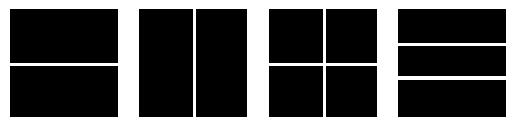

Original X2:


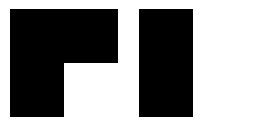

X:


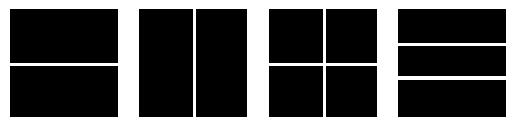

X2:


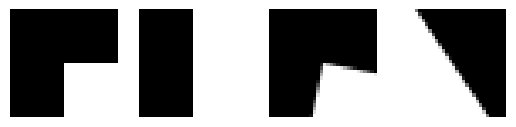

In [87]:
# Demonstration of equalizing the class distribution

# Test on some random images
# Create sample crosses as images

X = np.zeros((4, 32, 32, 3))
X[0, 16, :, :] = 1
X[1, :, 16, :] = 1
X[2, 16, :, :] = 1
X[2, :, 16, :] = 1
X[3, 10, :, :] = 1
X[3, 20, :, :] = 1

X2 = np.zeros((2, 32, 32, 3))
X2[0, 16:, 16:, :] = 1
X2[1, :, 16:, :] = 1



# Display sample images
print("Original X:")
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i])
    plt.axis('off')
plt.show()

print("Original X2:")
for i in range(2):
    plt.subplot(1, 4, i+1)
    plt.imshow(X2[i])
    plt.axis('off')

plt.show()

X, X2, y, y2 = equalize_classdistribution(X, X2, np.zeros(4), np.ones(2))
 

print("X:")
for i in range(max(len(X), len(X2))):
    plt.subplot(1, max(len(X), len(X2)), i+1)
    plt.imshow(X[i])
    plt.axis('off')
plt.show()

print("X2:")
for i in range(max(len(X), len(X2))):
    plt.subplot(1, max(len(X), len(X2)), i+1)
    plt.imshow(X2[i])
    plt.axis('off')